In [2]:
#Types of Linear Regression

#We will look nito linear regression in more detail and discuss another variant of linear regression nown as polynomial reression.

#Linear regression is one of the simplest algorithms you'll apply to a dataset to model the relationships between features and labels.

In [3]:
#For this first example, we'll use the Boston Dataset.

import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

from sklearn.datasets import load_boston
dataset = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [4]:

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

In [5]:
print(dataset.data)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [6]:
#The data is a two-dimensional array.  To know the name of each column, use the feature_names property:

print(dataset.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [7]:
#For the description of each feature, you can use the DESCR property:

print(dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [8]:
#The prices of houses is the information we are seeking, and it can be accessed via the target property:

print(dataset.target)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [9]:
#Now let's load the data into a Pandas DataFrame:

df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
#You would also want to add the prices of the houses to the DataFrame, so let's add a new column to the DataFrame and call it MEDV:

df['MEDV'] = dataset.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [11]:
#Data Cleansing

#The next step would be to clean the data and perform any conversion if necessary.  First, use the info() function to check the datatype of each field:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [12]:
#We need to check to see if there are any missing values:

print(df.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [13]:
#FEATURE SELECTION

#Now that the data is good to go, we are ready to move on to the nex step of the process.  
#As there are 13 features in the dataset, we do not want to use all of these features for training our model, because not all of them are relevant. 
#Instead, we want to choose those features taht directly influence the result to train the mode.
#For this, we can use the corr() function.

corr = df.corr()
print(corr)


             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

In [14]:
#A positive correlation is a relationshp between two variables in which both varaibles move in tandem.
#A positive correlation exists when one variable decreases as the other variable decreases.
#A negative correlation exists when two variables move in opposite directions.  

#Instead of visually finding the top two features with the highest correlation, we can do it as follows:

#---getthe top 3 features that have the highest correlation---
print(df.corr().abs().nlargest(3, 'MEDV').index)

#---print the top 3 correlation values---
print(df.corr().abs().nlargest(3, 'MEDV').values[:, 13])

Index(['MEDV', 'LSTAT', 'RM'], dtype='object')
[1.         0.73766273 0.69535995]


Text(0, 0.5, 'MEDV')

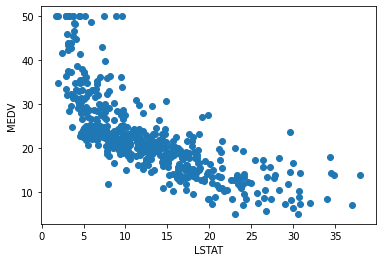

In [15]:
#MULTIPLE REGRESSION

#Let's plot a scatter plot showing the relationshp:

plt.scatter(df['LSTAT'], df['MEDV'], marker='o')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

Text(0, 0.5, 'MEDV')

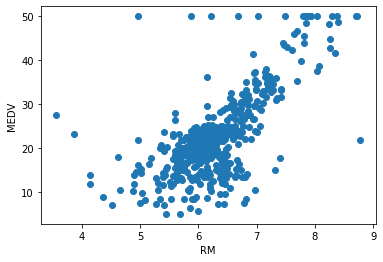

In [16]:
#Let's also plot a scatter plot showing the relationship between the RM feature and the MEDV label:


plt.scatter(df['RM'], df['MEDV'], marker='o')
plt.xlabel('RM')
plt.ylabel('MEDV')

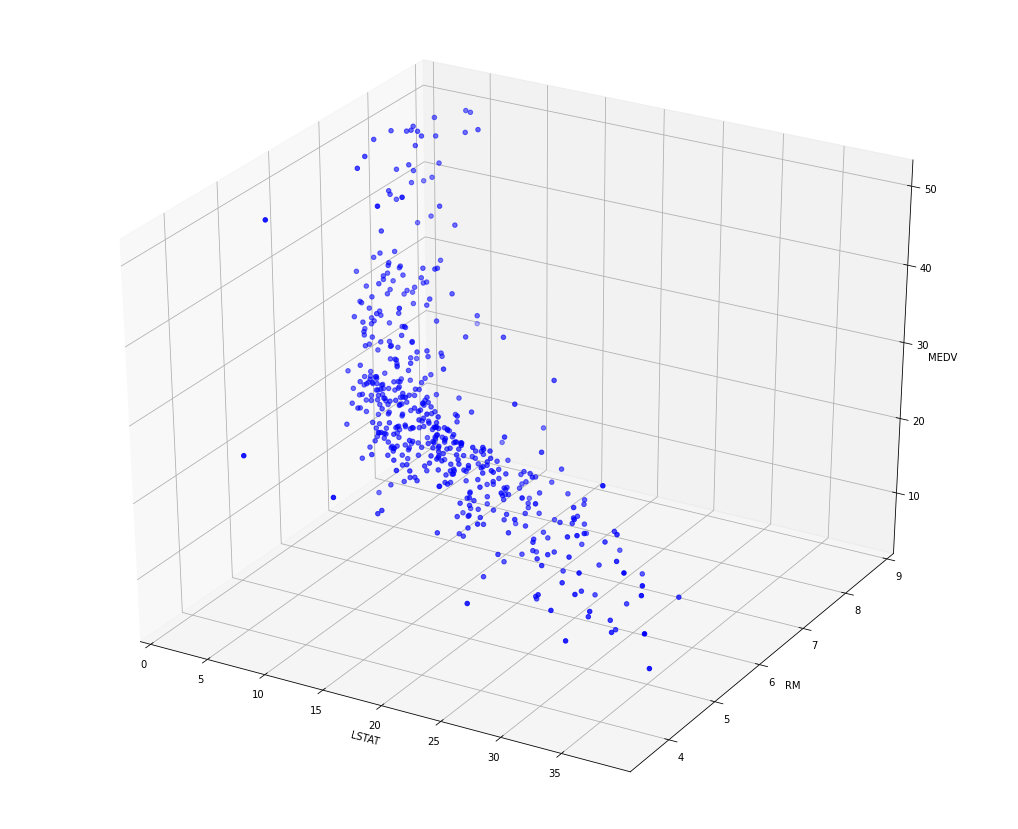

In [17]:
#Now let's plot the two features and the label on a 3D chart:

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['LSTAT'],
           df['RM'],
           df['MEDV'],
           c='b')

ax.set_xlabel("LSTAT")
ax.set_ylabel("RM")
ax.set_zlabel("MEDV")
plt.show()

In [18]:
#TRAINING THE MODEL

#We can now train the model.  
#First, create two DataFrames: x and y.  
#The x dataframe will contain the combination of the LSTAT and RM features, while the y dataframe will contain the MEDV label.

x = pd.DataFrame(np.c_[df['LSTAT'], df['RM']], columns = ['LSTAT', 'RM'])
Y = df['MEDV']

#We will split the dataset into 70 percent for training and 30 percent for testing:

from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size = 0.3, random_state=5)

In [19]:
#After the split, let's print out the shape of the training sets:
print(x_train.shape)
print(Y_train.shape)

(354, 2)
(354,)


In [20]:
#This means the x training is 354 rows and 2 columns.

#Now we begin the training:

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, Y_train)

price_pred = model.predict(x_test)
print('R-Squared: %.4f' % model.score(x_test, Y_test))

R-Squared: 0.6162


36.49422110915324


Text(0.5, 1.0, 'Actual prices vs Predicted prices')

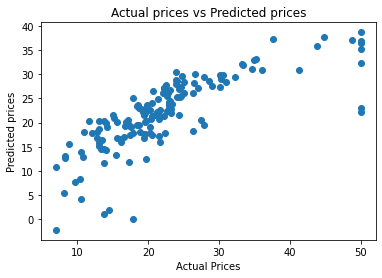

In [21]:
#We will also plot a scatter plot showing the actual price vs. the predicted price:

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y_test, price_pred)
print(mse)

plt.scatter(Y_test, price_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual prices vs Predicted prices")


In [22]:
#With the model trained, we can obtain the intercept as well as the coefficients of the features:

print(model.intercept_)
print(model.coef_)

0.38437936780346504
[-0.65957972  4.83197581]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

AttributeError: ignored

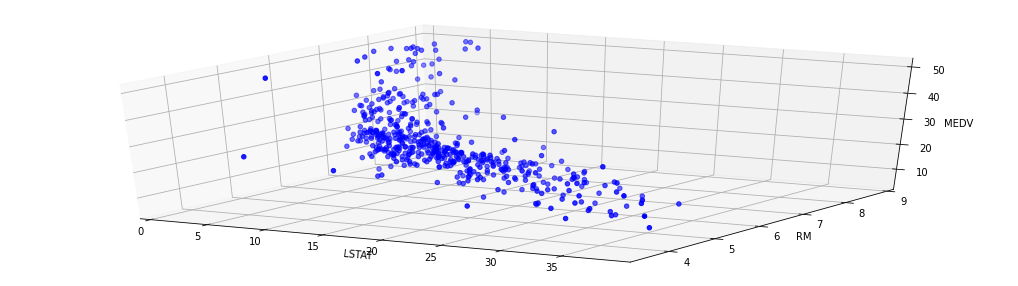

In [23]:
#PLOTTING THE 3D HYPERPLANE

#let's plot a 3D regression hyperplane showing the predictions:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

from sklearn.datasets import load_boston
dataset = load_boston()

df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['MEDV'] = dataset.target

x = pd.DataFrame(np.c_[df['LSTAT'], df['RM']], columns = ['LSTAT', 'RM'])
Y = df['MEDV']

fig = plt.figure(figsize=(18,5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['LSTAT'],
           df['RM'],
           Y,
           c='b')

ax.set_xlabel("LSTAT")
ax.set_ylabel("RM")
ax.set_zlabel("MEDV")

#---create a meshgrid of all the values for LSTAT and RM---
x_surf = np.arange(0, 40, 1)  #---for LSTAT---
y_surf = np.arange(0, 10, 1)  #---for RM---
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, Y)

#---calculate z(MEDC) based on the model---
z = lambda x,y: (model.intercept_ + model.coef_[0], * x + model.coef_[1] * y)

ax.plot_surface(x_surf, y_surf, z(x_surf, y_surf), 
                rstride=1,
                cstride=1,
                color='None',
                alpha=0.4)
plt.show()

In [24]:
#POLYNOMIAL REGRESSION

#In some cases, a curved line does better for a regression.

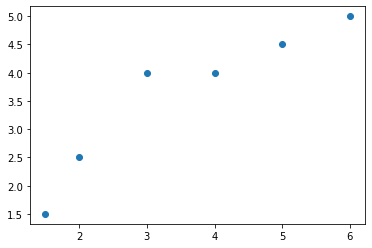

In [25]:
#Import Polynomial.csv and plot using scatter plot:

df = pd.read_csv('Polynomial.csv')
plt.scatter(df.x,df.y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


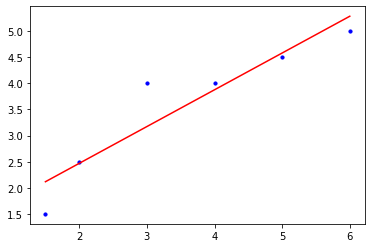

R-Squared for training set: 0.8658


In [26]:
#Using linear regression, you can try to plot a straight line cutting through most of the points:

model = LinearRegression()

x = df.x[0:6, np.newaxis] #---convert to 2D array---
y = df.y[0:6, np.newaxis] #---convert to 2D array---

model.fit(x,y)

#---perform predictio---
y_pred = model.predict(x)

#---plot the training points---
plt.scatter(x,y, s=10, color='b')

#---plot the straight line---
plt.plot(x,y_pred, color='r')
plt.show()

#---calculate R-Squared---
print('R-Squared for training set: %.4f' % model.score(x,y))

In [27]:
#In the following, we'll create a quadracit equation:

from sklearn.preprocessing import PolynomialFeatures
degree = 2
polynomial_features = PolynomialFeatures(degree = degree)

x_poly = polynomial_features.fit_transform(x)
print(x_poly)

[[ 1.    1.5   2.25]
 [ 1.    2.    4.  ]
 [ 1.    3.    9.  ]
 [ 1.    4.   16.  ]
 [ 1.    5.   25.  ]
 [ 1.    6.   36.  ]]


In [28]:
print(polynomial_features.get_feature_names('x'))

['1', 'x', 'x^2']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


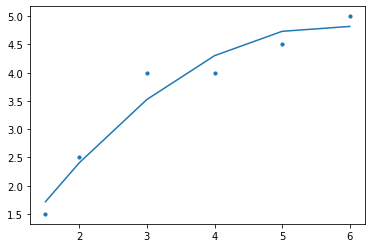

In [29]:
#You will now use this generted matrix with the LinearRegression class to train your model:

model = LinearRegression()
model.fit(x_poly,y)
y_poly_pred = model.predict(x_poly)

#---plot the points---
plt.scatter(x,y, s=10)

#---plot the regression line---
plt.plot(x,y_poly_pred)
plt.show()

In [30]:
#You can print the intercept and coefficients of the polynomial function:

print(model.intercept_)
print(model.coef_)

[-0.87153912]
[[ 0.          1.98293207 -0.17239897]]


In [31]:
#Here's the same regression with an R-Squared approach:

print('R-Squared for training set: %.4f' % model.score(x_poly,y))


R-Squared for training set: 0.9474


In [32]:
#Let's try the same thing with Degree = 3:

from sklearn.preprocessing import PolynomialFeatures
degree = 3
polynomial_features = PolynomialFeatures(degree = degree)

x_poly = polynomial_features.fit_transform(x)
print(x_poly)

[[  1.      1.5     2.25    3.375]
 [  1.      2.      4.      8.   ]
 [  1.      3.      9.     27.   ]
 [  1.      4.     16.     64.   ]
 [  1.      5.     25.    125.   ]
 [  1.      6.     36.    216.   ]]


In [33]:
print(polynomial_features.get_feature_names('x'))

['1', 'x', 'x^2', 'x^3']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


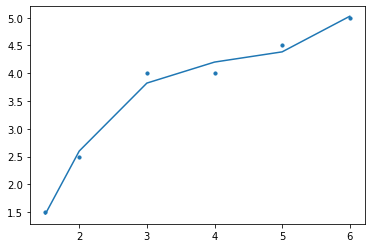

In [34]:
model = LinearRegression()
model.fit(x_poly,y)
y_poly_pred = model.predict(x_poly)

#---plot the points---
plt.scatter(x,y, s=10)

#---plot the regression line---
plt.plot(x,y_poly_pred)
plt.show()

In [35]:
print(model.intercept_)
print(model.coef_)

[-4.98877722]
[[ 0.          6.15864629 -1.39945504  0.10853453]]


In [36]:
print('R-Squared for training set: %.4f' % model.score(x_poly,y))

R-Squared for training set: 0.9889


In [41]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [64]:
#PLOTTING 3D HYPERPLANE

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression 
from sklearn.datasets import load_boston

dataset = load_boston()

df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['MEDV'] = dataset.target

x = pd.DataFrame(np.c_[df['LSTAT'], df['RM']], columns = ['LSTAT', 'RM'])
Y = df['MEDV']

fit = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x['LSTAT'],
           x['RM'],
           Y,
           c='b')

ax.set_xlabel("LSTAT")
ax.set_ylabel("RM")
ax.set_zlabel("MEDV")

#---create a meshgrid of all the values for LSTAT and RM---
x_surf = np.arange(0, 40, 1)  #---for LSTAT---
x_surf = np.arange(0, 10, 1)  #---for RM---
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

#---use a polynomial function of degree 2---
degree = 2
polynomial_features = PolynomialFeatures (degree = degree)
x_poly = polynomial_features.fit_transform(x)

print(polynomial_features.get_feature_names(['x', 'y']))

#---apply linnear regression---
model = LinearRegression()
model.fit(x_poly, Y)

#---calculate z(MEDV) based on the model---
z = lambda x,y: (model.intercept_ +
                (model.coef_[1] * x) +
                (model.coef_[2] * y) +
                (model.coef_[3] * x**2) +
                (model.coef_[4] * x*y) +
                (model.coef_[5] * y**2))

ax.plot_surface(x_surf, y_surf, z(x_surf, y_surf),
                rstride=1,
                cstride=1,
                color='None',
                alpha = 0.4)
plt.show()


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

['1', 'x', 'y', 'x^2', 'x y', 'y^2']


<Figure size 1296x1080 with 0 Axes>